In [1909]:
# load the iris dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
iris = load_iris()


In [1899]:
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target
  
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

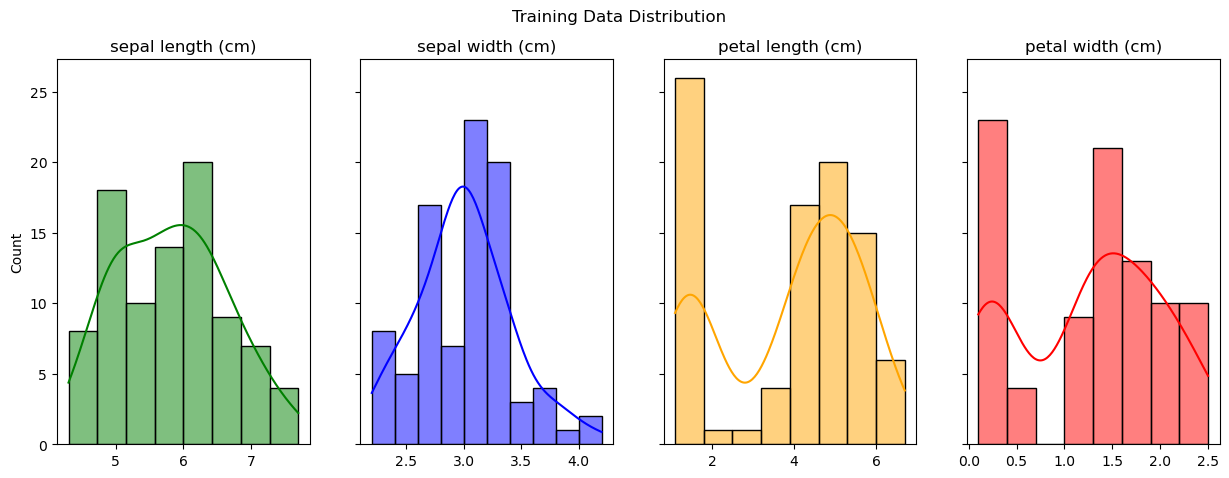

In [1939]:
#Visulaize the data distribution

fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Training Data Distribution')

sns.histplot(X_train[:, 0], kde=True, color="green", ax=axes[0])
axes[0].set_title(iris.feature_names[0])

sns.histplot(X_train[:, 1], kde=True, color="blue", ax=axes[1])
axes[1].set_title(iris.feature_names[1])

sns.histplot(X_train[:, 2], kde=True, color="orange", ax=axes[2])
axes[2].set_title(iris.feature_names[2])

sns.histplot(X_train[:, 3], kde=True, color="red", ax=axes[3])
axes[3].set_title(iris.feature_names[3])
fig.savefig('Simple_plot.png')


In [1905]:
import numpy as np

"""
Gaussian Naive Bayes is a classification algorithm that is based on the Bayes Theorem 
and the assumption of independence between features.

It is called "naive" because it assumes that all the features are independent of each other,
which is often a strong assumption but simplifies the calculation of the probability of a given class given a set of features. 

The algorithm is particularly suited for continuous data and can be used for both binary and multi-class classification problems.

"""

class GaussianNB(object):
    
    def __init__(self):
        pass

    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)  
  

    def _logsumexp(self, x):
        c = np.array(x).max()
        return c + np.log(np.sum(np.exp(x - c)))
     
    #log posterrior for each class: log(x)+log(y)=x*y
    def _log_likelihood(self, x):
        posteriors = []
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx]) 
            posterior = np.sum(np.log(self._pdf(idx, x) ))
            posterior = posterior + prior
            posteriors.append(posterior)
            
        return posteriors
    
    #probability for each class
    def predict_proba(self, X):
        x = [self._log_likelihood(x) for x in X]
        proba = np.exp(np.array(x) - self._logsumexp(x))
        return proba
    
    
    def _predict(self, x):
        posteriors = self._log_likelihood(x)
        return self._classes[np.argmax(posteriors)]

    #probability density function - (2*pi*var)**2 * exp(-(x-mean)**2/2*var))
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [1906]:
model = GaussianNB()

In [1907]:
model.fit(X_train, y_train)

In [1908]:
predicted  = model.predict(X_test)
predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [1904]:
#Accuracy Score
np.sum(predicted==y_test)/X_test.shape[0]* 100

96.66666666666667